Final Project 

In [1]:
# Code that lets me work with tidyverse and other related libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv("https://raw.githubusercontent.com/saclovessoup/dsci-100-project/refs/heads/main/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


subscribe,played_hours,Age,played_bin
<fct>,<dbl>,<dbl>,<fct>
TRUE,30.3,9,20-50
TRUE,3.8,17,0-5
FALSE,0.0,17,0-5
TRUE,0.7,21,0-5
TRUE,0.1,21,0-5
TRUE,0.0,17,0-5
TRUE,0.0,19,0-5
FALSE,0.0,21,0-5
TRUE,0.1,47,0-5


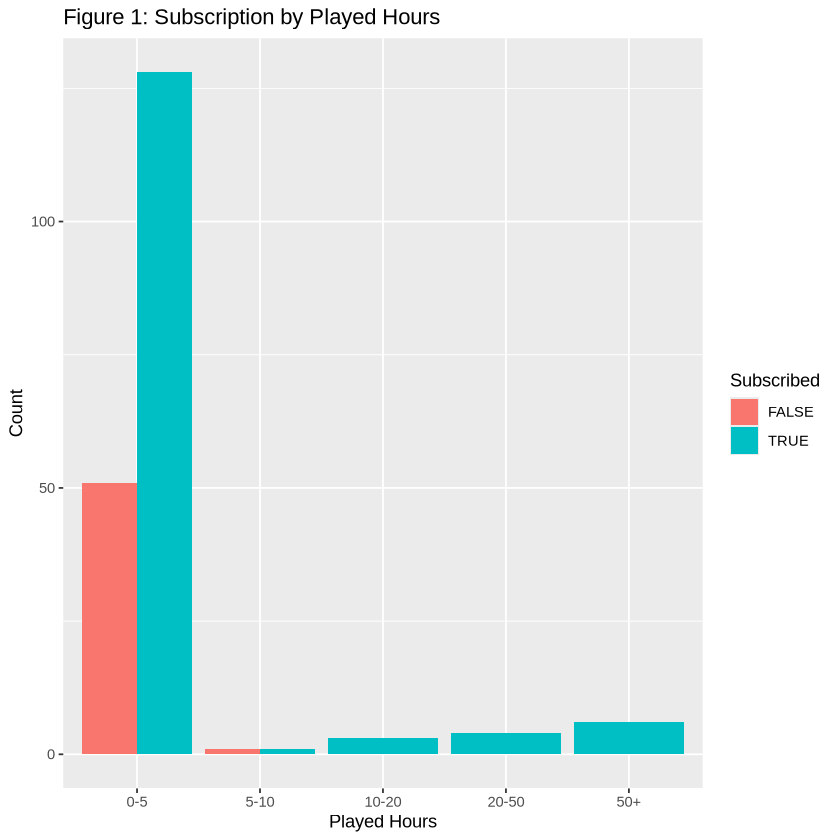

In [22]:
players_played_hrs <- players |>
  mutate(played_bin = cut(
    played_hours,
    breaks = c(0, 5, 10, 20, 50, Inf),
    labels = c("0-5", "5-10", "10-20", "20-50", "50+"), include.lowest = TRUE
  ))
players_played_hrs
ggplot(players_played_hrs, aes(x = played_bin, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Figure 1: Subscription by Played Hours",
    x = "Played Hours",
    y = "Count",
    fill = "Subscribed"
  )


subscribe,played_hours,Age,age_bin
<fct>,<dbl>,<dbl>,<fct>
TRUE,30.3,9,0-15
TRUE,3.8,17,16-20
FALSE,0.0,17,16-20
TRUE,0.7,21,21-25
TRUE,0.1,21,21-25
TRUE,0.0,17,16-20
TRUE,0.0,19,16-20
FALSE,0.0,21,21-25
TRUE,0.1,47,41-50


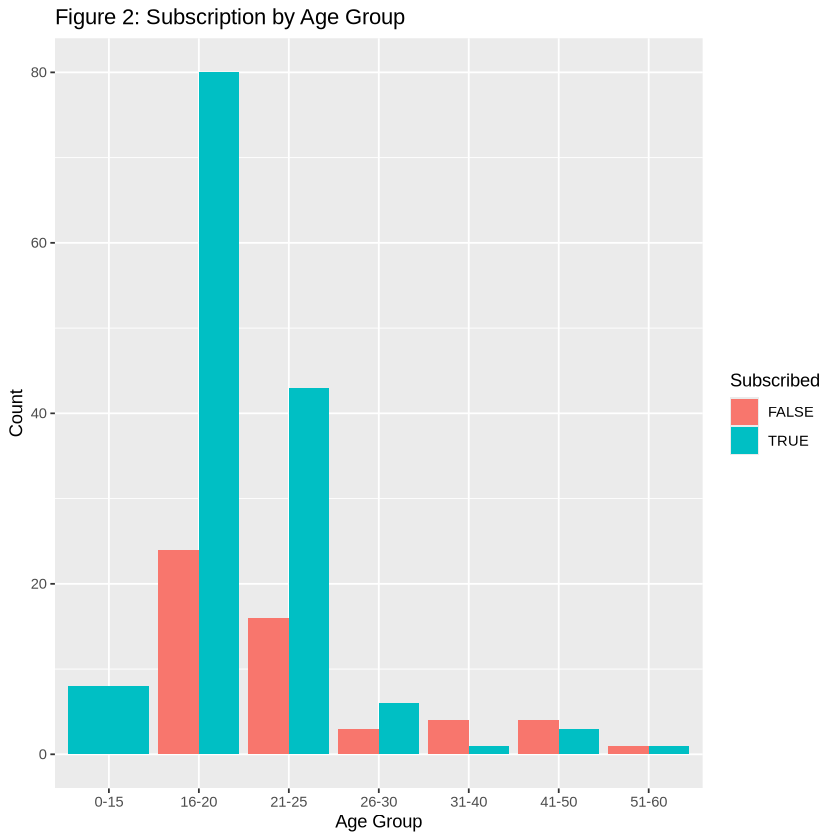

In [19]:
# adding another column called age_bin to group ages into categories for our visualization
players_age <- players |>
  mutate(age_bin = cut(
    Age,
    breaks = c(0, 15, 20, 25, 30, 40, 50, 60, Inf),
    labels = c("0-15", "16-20", "21-25", "26-30", "31-40", "41-50", "51-60", "60+")
  ))
players_age
ggplot(players_age, aes(x = age_bin, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Figure 2: Subscription by Age Group",
    x = "Age Group",
    y = "Count",
    fill = "Subscribed"
  )


In [6]:
players <- players |>
  mutate(
    subscribe = as_factor(subscribe) #converts subscribe into a factor for classification
  ) |>
  select(subscribe, played_hours, Age) # keep the columns that affects our prediction

players <- players |>
  drop_na() #dropping all the NA values to make all the lines of the data comparable 
players

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17
TRUE,0.0,19
FALSE,0.0,21
TRUE,0.1,47


In [29]:
set.seed(1)

player_split <- initial_split(players, prop = 0.75, strata = subscribe) #splitting the data into training and testing sets
player_train <- training(player_split)
player_test <- testing(player_split)

In [30]:
# recipe of the algorithm
set.seed(1)
player_recipe <- recipe(subscribe ~ played_hours + Age, 
                        data = player_train) |> 
  step_scale(all_predictors()) |>
  step_center(all_predictors())
player_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [31]:
# nearest_neighbor algorithm to find the best k value
set.seed(1)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [32]:
#cross-validation algorithm
set.seed(1)
player_vfold <- vfold_cv(player_train, v = 5, strata = subscribe)

knn_results <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = player_vfold, grid = tibble(neighbors = seq(1, 100, 5))) |>
  collect_metrics()

accuracies <- knn_results |> filter(.metric == "accuracy")

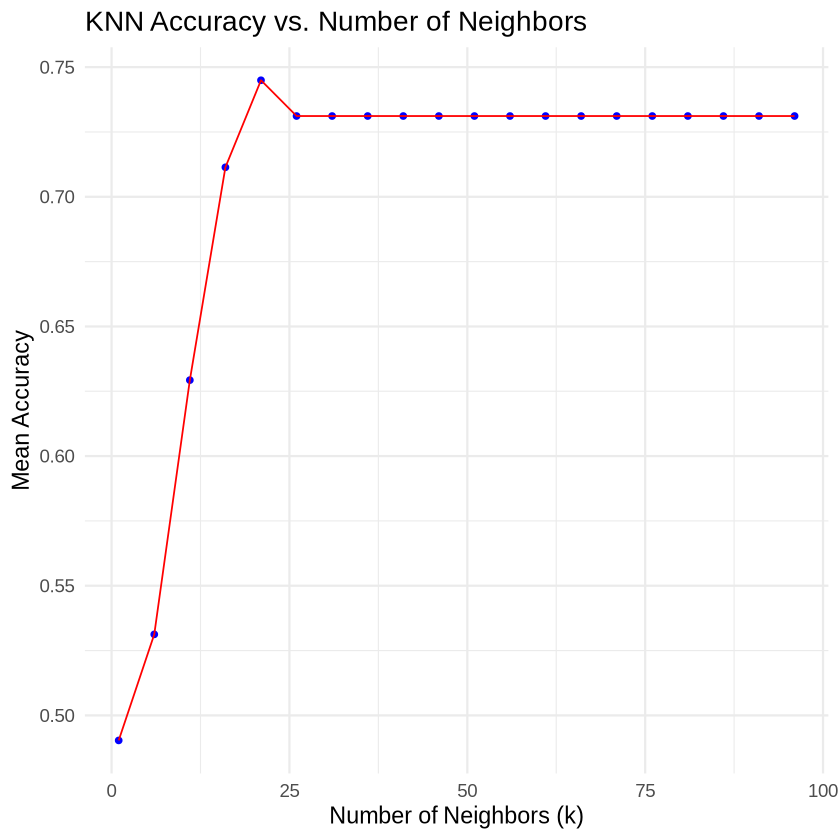

In [33]:
#plotting k vs accuracy graph
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point(color = "blue") +
  geom_line(color = "red") +
  labs(
    title = "KNN Accuracy vs. Number of Neighbors",
    x = "Number of Neighbors (k)",
    y = "Mean Accuracy"
  ) +
  theme_minimal(base_size = 14)

accuracy_vs_k

In [34]:
#finding the best k
best_k <- accuracies |>
  arrange(desc(mean)) |>
  slice(1) |>
  pull(neighbors)
best_k

[1] 21

In [35]:
# algorithm with the best k value
set.seed(1)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(knn_spec) |>
  fit(data = player_train)
knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(21,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2689655
Best kernel: rectangular
Best k: 21

In [37]:
# getting the prediction and finding the accuracy
set.seed(1)
test_preds <- predict(knn_fit, player_test) |>
  bind_cols(player_test)
test_preds

test_metrics <- validation_pred |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")
test_metrics

.pred_class,subscribe,played_hours,Age
<fct>,<fct>,<dbl>,<dbl>
TRUE,TRUE,0.7,21
TRUE,TRUE,0.1,21
TRUE,TRUE,0.0,17
TRUE,TRUE,0.0,19
TRUE,FALSE,0.0,21
TRUE,TRUE,0.0,22
TRUE,TRUE,1.6,23
TRUE,TRUE,1.5,25
TRUE,TRUE,0.2,22


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939


In [39]:
confusion_matrix <- conf_mat(test_preds, truth = subscribe, estimate = .pred_class)

confusion_matrix

          Truth
Prediction FALSE TRUE
     FALSE     1    1
     TRUE     12   35